/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:377: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:387: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:397: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:407: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept val

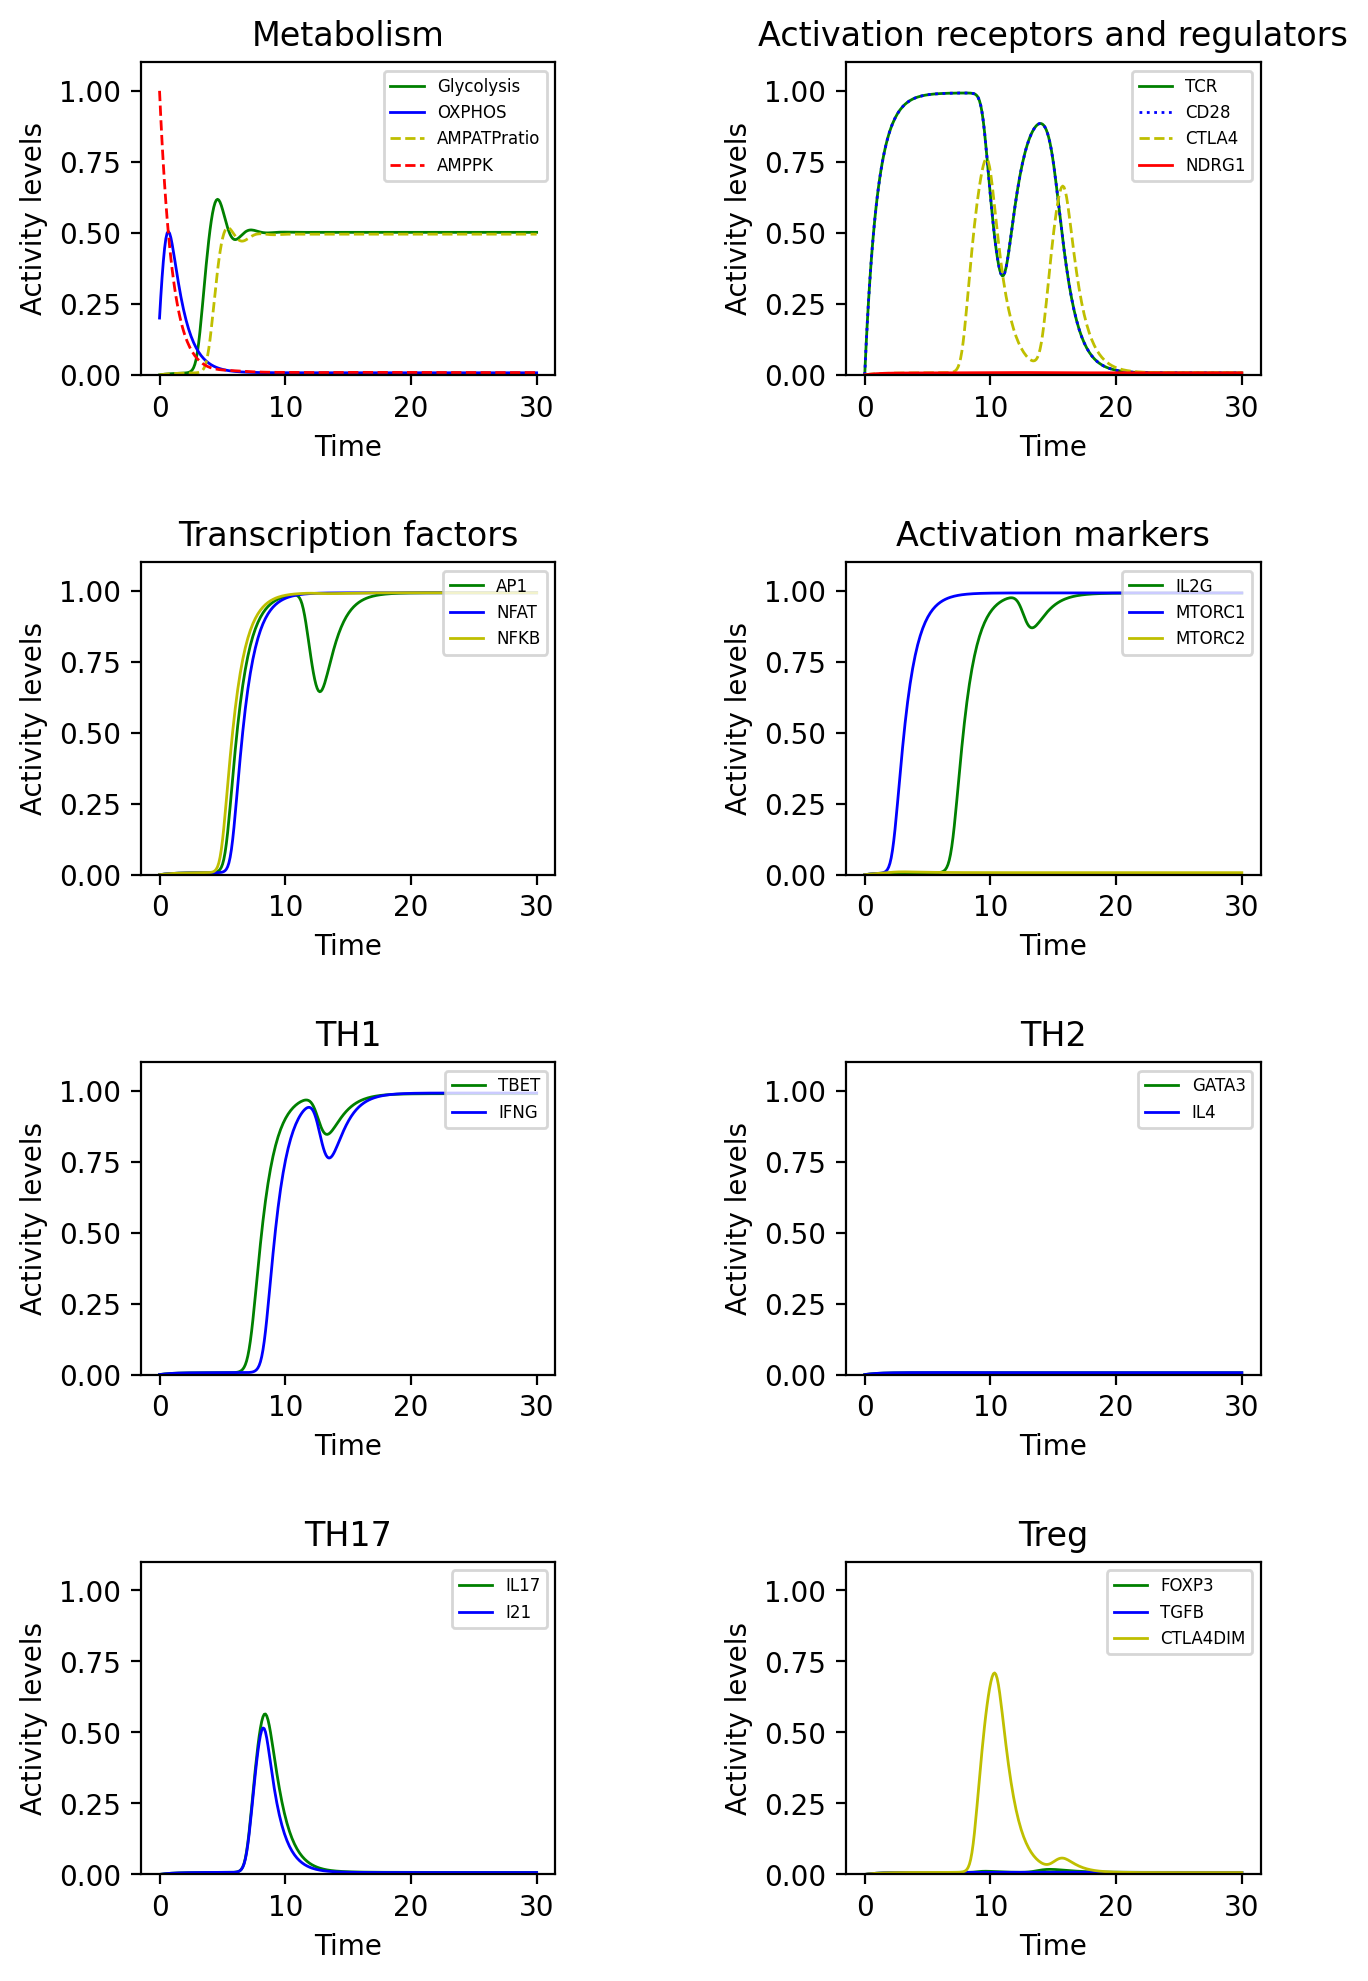

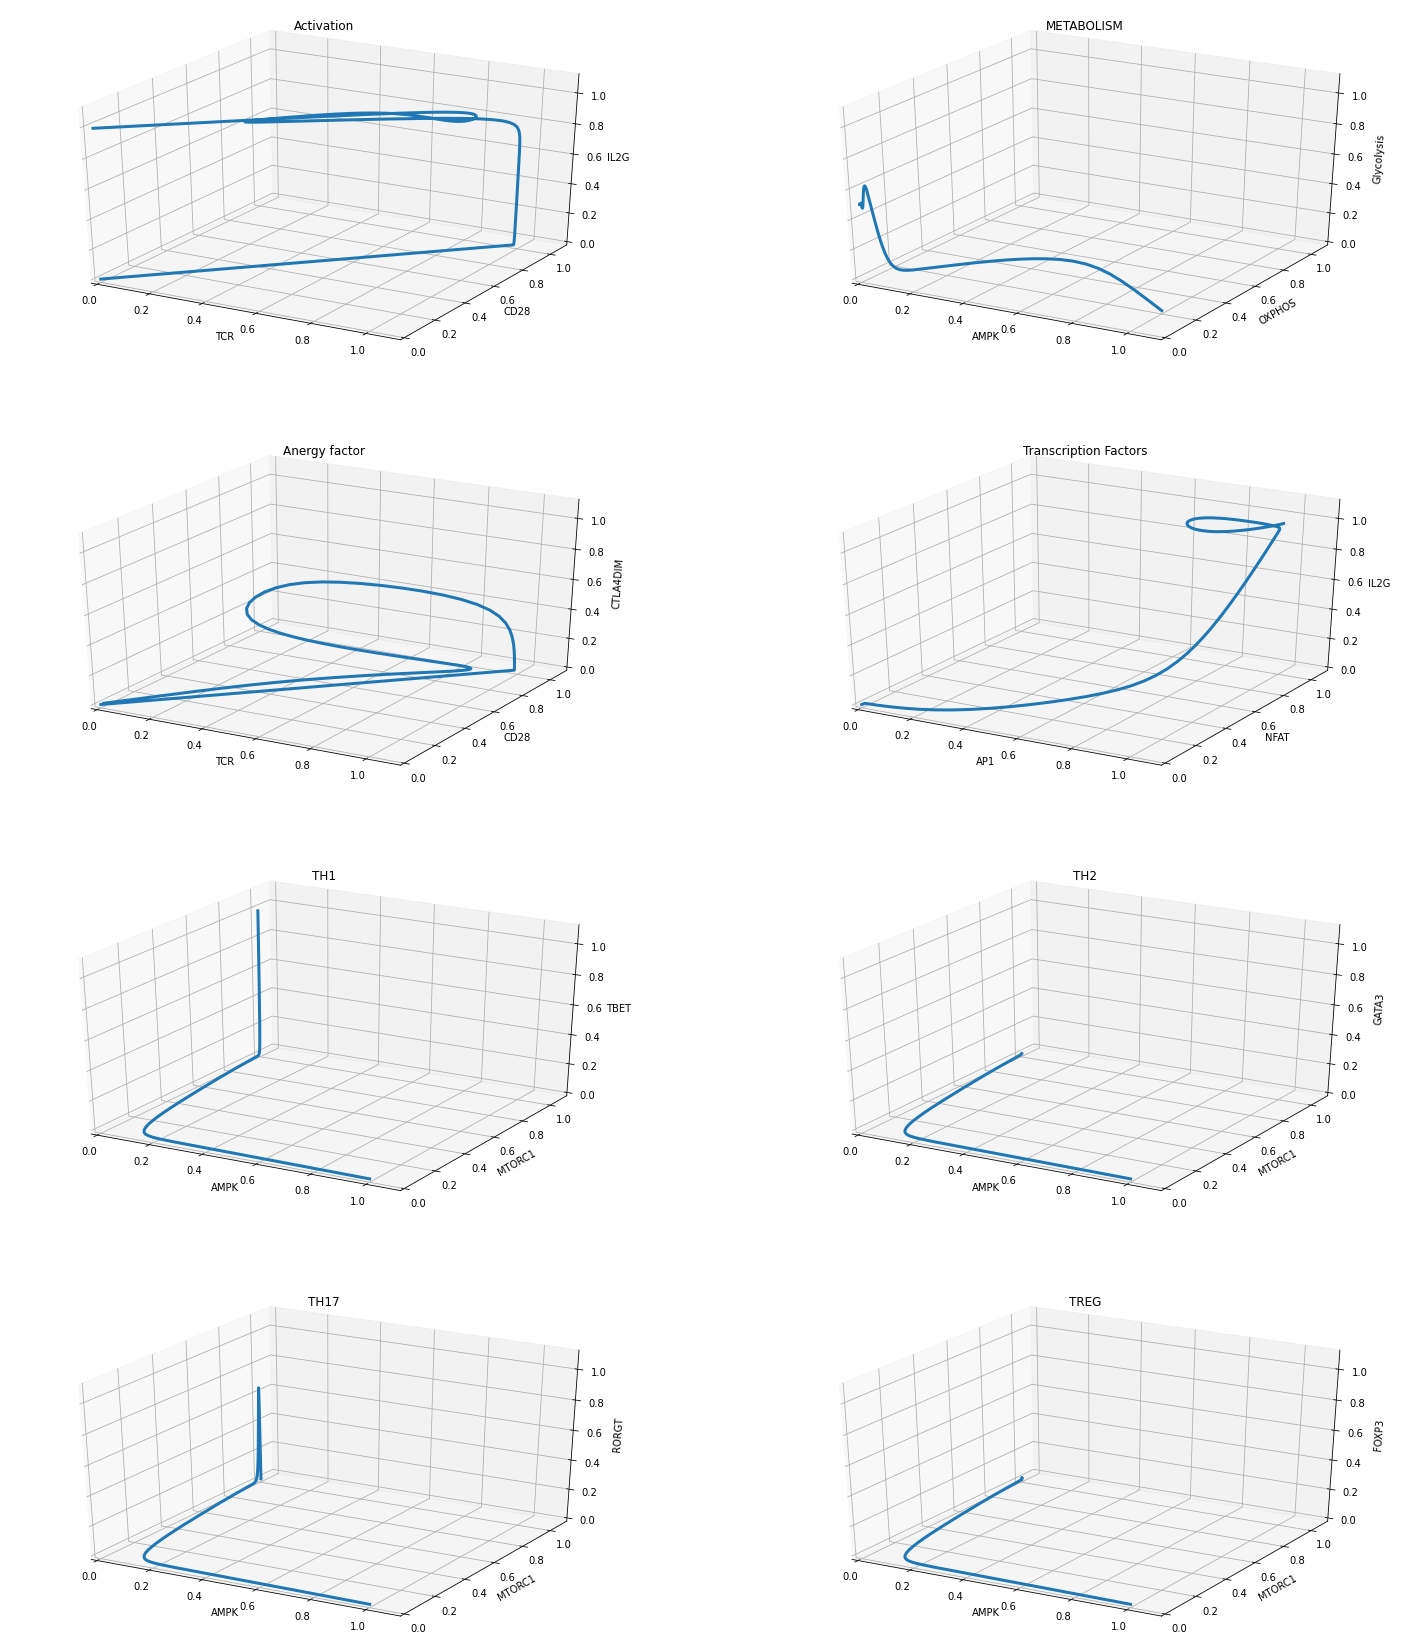

In [ ]:
# Programa en Python para la simulación de activación, diferenciación y metabolismo de células T CD4. 
# V 1.1
# Dr. David Martínez Méndez.
# Ciudad de México, 16 de Julio de 2021. Universidad Nacional Autónoma de México.
# davidmm@fisica.unam.mx

#Paqueterías:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import e

DCTLA4 = 1
DCTLA4DIM = 1
DTCR = 1
DCD28 = 1
DAP1 = 1
DCD25 = 1
DIL2G = 1
DMTOR = 1
DZAP70 = 1
DSTAT5 = 1
DNFAT = 1
DNFKB = 1
DAKT = 1
DBCL2 = 1
DNDRG1 = 1
DDAG = 1
DSOS = 1
DRASGTPR = 1
DLCK = 1
DPDK1 = 1
DLAT = 1
DPLC = 1
DPIP2 = 1
DPIP3 = 1
DCA = 1
DPKC = 1
DTBET = 1
DIFNG = 1
DGATA3 = 1
DIL4 = 1
DFOXP3 = 1
DIL10 = 1
DTGFB = 1
DRORGT = 1
DIL21 = 1
DIL17 = 1
DMTORC1 = 1
DMTORC2 = 1
DLKB1 = 1
DAMPK = 1
DGlycolysis = 1
DOXPHOS = 1
DAMPATPratio = 1

# Inputs
# Tasa de saturación de respuesta
b = 10

# Settings de presentación (afinidad y tiempo)
AttAnt = 1
TAnt = 15

# Settings de co-estimulación (afinidad y tiempo)
AttCD8086 = 1
TCD8086 = 15

# Settings de citocinas externas inductoras de fenotipos
IFNGE = 1
IL12E = 1
IL4E = 1
TGFBE = 1
IL10E = 1
IL21E = 1

# Settings de fármacos
metformin = 0
adiponectin = 0
quercitin = 0
resveratrol = 0

def odes(x, t):
    # Asignar cada elemento de la red a un elemento vector 
    # (OJO. mantener siempre el mismo orden en todas las listas en adelante)
    TCR = x[0]
    CD28 = x[1]
    AP1 = x[2]
    CD25 = x[3]
    IL2G = x[4]
    MTOR = x[5]
    ZAP70 = x[6]
    STAT5 = x[7]
    NFAT = x[8]
    NFKB = x[9]
    AKT = x[10]
    CTLA4 = x[11]
    CTLA4DIM = x[12]
    BCL2 = x[13]
    NDRG1 = x[14]
    DAG = x[15]
    SOS = x[16]
    RASGTPR = x[17]
    LCK = x[18]
    PDK1 = x[19]
    LAT = x[20]
    PLC = x[21]
    PIP2 = x[22]
    PIP3 = x[23]
    CA = x[24]
    PKC = x[25]
    TBET = x[26]
    IFNG = x[27]
    GATA3 = x[28]
    IL4 = x[29]
    FOXP3 = x[30]
    IL10 = x[31]
    TGFB = x[32]
    RORGT = x[33]
    IL21 = x[34]
    IL17 = x[35]
    MTORC1 = x[36]
    MTORC2 = x[37]
    LKB1 = x[38]
    AMPK = x[39]
    Glycolysis = x[40]
    OXPHOS = x[41]
    AMPATPratio = x[42]
    
    # Funciones para presentación y co-estimulación
    Antigen = AttAnt / (1 + e ** (+ 1 * (t - TAnt)))
    CD8086 = AttCD8086 / (1 + e ** (+ 1 * (t - TCD8086)))

    # Funciones difusas
    WTCR = Antigen * (1 - CTLA4DIM)
    WCD28 = CD8086 * (1 - CTLA4DIM)
    WAP1 = RASGTPR
    WCD25 = IL2G * (1 - CTLA4DIM)
    WIL2G = NFAT * AP1 * (1 - NDRG1)
    WMTOR = CD25 + AKT - CD25 * AKT
    WZAP70 = TCR * LCK * (1 - CTLA4DIM)
    WSTAT5 = CD25 * (1 - CTLA4DIM)
    WNFAT = CA
    WNFKB = PKC
    WAKT = (CD28 * (1 - CTLA4DIM) + PDK1) - (CD28 * (1 - CTLA4DIM) * PDK1)
    WCTLA4 = IL2G * ZAP70
    WCTLA4DIM = (CTLA4 * CD8086) + (FOXP3 * TGFB) - (CTLA4 * CD8086) * (FOXP3 * TGFB)
    WBCL2 = AKT
    WNDRG1 = NFAT * (1 - AKT)
    WDAG = PLC
    WSOS = CD28
    WRASGTPR = (LAT * SOS * DAG) + (CD25 * DAG) - (LAT * SOS * DAG)*(CD25 * DAG)
    WLCK = TCR * (1 - CTLA4DIM)
    WPDK1 = (CD25 + CD28) - (CD25 * CD28)
    WLAT = ZAP70
    WPLC = (ZAP70 + CD25) - (ZAP70 * CD25)
    WPIP2 = PLC
    WPIP3 = PIP2
    WCA = PIP3
    WPKC = DAG
    WTBET = (IL12E * IFNGE * MTORC1 * NFKB * NFAT * AP1) * (1 - IL4) * (1 - IL10) * (1 - GATA3)
    WIFNG = TBET * AP1 * NFAT
    WGATA3 = (IL4E * MTORC2 * STAT5 * NFAT) * (1 - TBET) * (1 - TGFB) * (1 - IFNG)
    WIL4 = (GATA3 * (1 - TBET)) * (1 - IFNG)
    WFOXP3 = ((TGFBE * IL10E * NFAT * STAT5 * AP1 * IL2G) + (TGFBE * IL10E * IL10 * CTLA4) + (TGFBE * TGFB) -
                        (TGFBE * IL10E * NFAT * STAT5 * AP1 * IL2G) * (TGFBE * IL10E * IL10 * CTLA4) * (TGFBE * TGFB) ) * (1 - IFNG)
    WIL10 = TGFBE * FOXP3
    WTGFB = FOXP3
    WRORGT = (IL21E * TGFBE * AP1 * MTORC1) * (1 - TBET) * (1 - FOXP3) * (1 - GATA3)
    WIL21 = (IL21E * RORGT) * (1 - IFNG) * (1 - IL4) * (1 - IL10)
    WIL17 = RORGT
    WMTORC1 = MTOR * (1 - AMPK)
    WMTORC2 = MTOR * AMPK
    WLKB1 = (AKT * AMPATPratio) + (quercitin * resveratrol) - (AKT * AMPATPratio) * (quercitin * resveratrol)
    WAMPK = (LKB1 * (1 - MTORC1)) + (CA * AMPATPratio * (1 - MTORC1)) + (AKT * AMPATPratio *
                (1 - MTORC1)) + FOXP3 + metformin + adiponectin - (LKB1 * (1 - MTORC1)) * (CA * AMPATPratio *
                 (1 - MTORC1)) * (AKT * AMPATPratio * (1 - MTORC1)) * FOXP3 * metformin * adiponectin
    WGlycolysis = MTORC1 * (1 - AMPATPratio)
    WOXPHOS = AMPK
    WAMPATPratio = Glycolysis * (1 - OXPHOS)
   
    # Definir cada ecuación diferencial
    dTCRdt = 1 / (1 + e ** (-b * (WTCR - .5))) - DTCR * TCR
    dCD28dt = 1 / (1 + e ** (-b * (WCD28 - .5))) - DCD28 * CD28
    dAP1dt = 1 / (1 + e ** (-b * (WAP1 - .5))) - DAP1 * AP1
    dCD25dt = 1 / (1 + e ** (-b * (WCD25 - .5))) - DCD25 * CD25
    dIL2Gdt = 1 / (1 + e ** (-b * (WIL2G - .5))) - DIL2G * IL2G
    dMTORdt = 1 / (1 + e ** (-b * (WMTOR - .5))) - DMTOR * MTOR
    dZAP70dt = 1 / (1 + e ** (-b * (WZAP70 - .5))) - DZAP70 * ZAP70
    dSTAT5dt = 1 / (1 + e ** (-b * (WSTAT5 - .5))) - DSTAT5 * STAT5
    dNFATdt = 1 / (1 + e ** (-b * (WNFAT - .5))) - DNFAT * NFAT
    dNFKBdt = 1 / (1 + e ** (-b * (WNFKB - .5))) - DNFKB * NFKB
    dAKTdt = 1 / (1 + e ** (-b * (WAKT - .5))) - DAKT * AKT
    dCTLA4dt = 1 / (1 + e ** (-b * (WCTLA4 - .5))) - DCTLA4 * CTLA4
    dCTLA4DIMdt = 1 / (1 + e ** (-b * (WCTLA4DIM - .5))) - DCTLA4DIM * CTLA4DIM
    dBCL2dt = 1 / (1 + e ** (-b * (WBCL2 - .5))) - DBCL2 * BCL2
    dNDRG1dt = 1 / (1 + e ** (-b * (WNDRG1 - .5))) - DNDRG1 * NDRG1
    dDAGdt = 1 / (1 + e ** (-b * (WDAG - .5))) - DDAG * DAG
    dSOSdt = 1 / (1 + e ** (-b * (WSOS - .5))) - DSOS * SOS
    dRASGTPRdt = 1 / (1 + e ** (-b * (WRASGTPR - .5))) - DRASGTPR * RASGTPR
    dLCKdt = 1 / (1 + e ** (-b * (WLCK - .5))) - DLCK * LCK
    dPDK1dt = 1 / (1 + e ** (-b * (WPDK1 - .5))) - DPDK1 * PDK1
    dLATdt = 1 / (1 + e ** (-b * (WLAT - .5))) - DLAT * LAT
    dPLCdt = 1 / (1 + e ** (-b * (WPLC - .5))) - DPLC * PLC
    dPIP2dt = 1 / (1 + e ** (-b * (WPIP2 - .5))) - DPIP2 * PIP2
    dPIP3dt = 1 / (1 + e ** (-b * (WPIP3 - .5))) - DPIP3 * PIP3
    dCAdt = 1 / (1 + e ** (-b * (WCA - .5))) - DCA * CA
    dPKCdt = 1 / (1 + e ** (-b * (WPKC - .5))) - DPKC * PKC
    dTBETdt = 1 / (1 + e ** (-b * (WTBET - .5))) - DTBET * TBET
    dIFNGdt = 1 / (1 + e ** (-b * (WIFNG - .5))) - DIFNG * IFNG
    dGATA3dt = 1 / (1 + e ** (-b * (WGATA3 - .5))) - DGATA3 * GATA3
    dIL4dt = 1 / (1 + e ** (-b * (WIL4 - .5))) - DIL4 * IL4
    dFOXP3dt = 1 / (1 + e ** (-b * (WFOXP3 - .5))) - DFOXP3 * FOXP3
    dIL10dt = 1 / (1 + e ** (-b * (WIL10 - .5))) - DIL10 * IL10
    dTGFBdt = 1 / (1 + e ** (-b * (WTGFB - .5))) - DTGFB * TGFB
    dRORGTdt = 1 / (1 + e ** (-b * (WRORGT - .5))) - DRORGT * RORGT
    dIL21dt = 1 / (1 + e ** (-b * (WIL21 - .5))) - DIL21 * IL21
    dIL17dt = 1 / (1 + e ** (-b * (WIL17 - .5))) - DIL17 * IL17
    dMTORC1dt = 1 / (1 + e ** (-b * (WMTORC1 - .5))) - DMTORC1 * MTORC1
    dMTORC2dt = 1 / (1 + e ** (-b * (WMTORC2 - .5))) - DMTORC2 * MTORC2
    dLKB1dt = 1 / (1 + e ** (-b * (WLKB1 - .5))) - DLKB1 * LKB1
    dAMPKdt = 1 / (1 + e ** (-b * (WAMPK - .5))) - DAMPK * AMPK
    dGlycolysisdt = 1 / (1 + e ** (-b * (WGlycolysis - .5))) - DGlycolysis * Glycolysis
    dOXPHOSdt = 1 / (1 + e ** (-b * (WOXPHOS - .5))) - DOXPHOS * OXPHOS
    dAMPATPratiodt = 1 / (1 + e ** (-b * (WAMPATPratio - .5))) - DAMPATPratio * AMPATPratio
    
    return [dTCRdt, dCD28dt, dAP1dt, dCD25dt, dIL2Gdt, dMTORdt, dZAP70dt, dSTAT5dt, dNFATdt, dNFKBdt, dAKTdt, dCTLA4dt,
            dCTLA4DIMdt, dBCL2dt, dNDRG1dt, dDAGdt, dSOSdt, dRASGTPRdt, dLCKdt, dPDK1dt,  dLATdt,
            dPLCdt, dPIP2dt, dPIP3dt, dCAdt, dPKCdt, dTBETdt, dIFNGdt, dGATA3dt, dIL4dt, dFOXP3dt, dIL10dt, dTGFBdt,
            dRORGTdt, dIL21dt, dIL17dt, dMTORC1dt, dMTORC2dt, dLKB1dt, dAMPKdt, dGlycolysisdt, dOXPHOSdt, dAMPATPratiodt]

# Condiciones iniciales para cada ODE (seguir orden)
x0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0.2, 0]

# Solución:
# Declarar un vector de tiempo para la solución de ODEs
t = np.linspace(0, 30, 300)

# Evaluar todos los vectores en forma de matriz de resultados "x"
x = odeint(odes, x0, t)

# Declarar y asignar las filas de matriz de resultados a cada elemento de la red
TCR = x[:, 0]
CD28 = x[:, 1]
AP1 = x[:, 2]
CD25 = x[:, 3]
IL2G = x[:, 4]
MTOR = x[:, 5]
ZAP70 = x[:, 6]
STAT5 = x[:, 7]
NFAT = x[:, 8]
NFKB = x[:, 9]
AKT = x[:, 10]
CTLA4 = x[:, 11]
CTLA4DIM = x[:, 12]
BCL2 = x[:, 13]
NDRG1 = x[:, 14]
DAG = x[:, 15]
SOS = x[:, 16]
RASGTPR = x[:, 17]
LCK = x[:, 18]
PDK1 = x[:, 19]
LAT = x[:, 20]
PLC = x[:, 21]
PIP2 = x[:, 22]
PIP3 = x[:, 23]
CA = x[:, 24]
PKC = x[:, 25]
TBET = x[:, 26]
IFNG = x[:, 27]
GATA3 = x[:, 28]
IL4 = x[:, 29]
FOXP3 = x[:, 30]
IL10 = x[:, 31]
TGFB = x[:, 32]
RORGT = x[:, 33]
IL21 = x[:, 34]
IL17 = x[:, 35]
MTORC1 = x[:, 36]
MTORC2 = x[:, 37]
LKB1 = x[:, 38]
AMPK = x[:, 39]
Glycolysis = x[:, 40]
OXPHOS = x[:, 41]
AMPATPratio = x[:, 42]

# Imprimir resultados
# Settings de plot general (conjunto de subplots)
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2 , figsize=(8, 12), dpi=200 )
fig.subplots_adjust(left=0.2, wspace=0.7, hspace=0.6)

# Settings individuales de subplots
ax1.plot(t, Glycolysis, 'g-', linewidth=1, label='Glycolysis')
ax1.plot(t, OXPHOS, 'b-', linewidth=1, label='OXPHOS')
ax1.plot(t, AMPATPratio, 'y--', linewidth=1, label='AMPATPratio')
ax1.plot(t, AMPK, 'r--', linewidth=1, label='AMPPK')
ax1.set_title('Metabolism')
ax1.set_ylabel('Activity levels')
ax1.set_xlabel('Time')
ax1.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax1.set_ylim(0, 1.1)

ax2.plot(t, TCR, 'g-', linewidth=1, label='TCR')
ax2.plot(t, CD28, 'b:', linewidth=1, label='CD28')
ax2.plot(t, CTLA4, 'y--', linewidth=1, label='CTLA4')
ax2.plot(t, NDRG1, 'r-', linewidth=1, label='NDRG1')
ax2.set_title('Activation receptors and regulators')
ax2.set_ylabel('Activity levels')
ax2.set_xlabel('Time')
ax2.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax2.set_ylim(0, 1.1)

ax3.plot(t, AP1, 'g-', linewidth=1, label='AP1')
ax3.plot(t, NFAT, 'b-', linewidth=1, label='NFAT')
ax3.plot(t, NFKB, 'y-', linewidth=1, label='NFKB')
ax3.set_title('Transcription factors')
ax3.set_ylabel('Activity levels')
ax3.set_xlabel('Time')
ax3.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax3.set_ylim(0, 1.1)

ax4.plot(t, IL2G, 'g-', linewidth=1, label='IL2G')
ax4.plot(t, MTORC1, 'b-', linewidth=1, label='MTORC1')
ax4.plot(t, MTORC2, 'y-', linewidth=1, label='MTORC2')
ax4.set_title('Activation markers')
ax4.set_ylabel('Activity levels')
ax4.set_xlabel('Time')
ax4.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax4.set_ylim(0, 1.1)

ax5.plot(t, TBET, 'g-', linewidth=1, label='TBET')
ax5.plot(t, IFNG, 'b-', linewidth=1, label='IFNG')
ax5.set_title('TH1')
ax5.set_ylabel('Activity levels')
ax5.set_xlabel('Time')
ax5.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax5.set_ylim(0, 1.1)

ax6.plot(t, GATA3, 'g-', linewidth=1, label='GATA3')
ax6.plot(t,  IL4, 'b-', linewidth=1, label='IL4')
ax6.set_title('TH2')
ax6.set_ylabel('Activity levels')
ax6.set_xlabel('Time')
ax6.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax6.set_ylim(0, 1.1)

ax7.plot(t, IL17, 'g-', linewidth=1, label='IL17')
ax7.plot(t, IL21, 'b-', linewidth=1, label='I21')
ax7.set_title('TH17')
ax7.set_ylabel('Activity levels')
ax7.set_xlabel('Time')
ax7.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax7.set_ylim(0, 1.1)

ax8.plot(t, FOXP3, 'g-', linewidth=1, label='FOXP3')
ax8.plot(t, TGFB, 'b-', linewidth=1, label='TGFB')
ax8.plot(t, CTLA4DIM, 'y-', linewidth=1, label='CTLA4DIM')
ax8.set_title('Treg')
ax8.set_ylabel('Activity levels')
ax8.set_xlabel('Time')
ax8.legend(frameon=True, loc='upper right', ncol=1, prop={'size': 6})
ax8.set_ylim(0, 1.1)

plt.savefig("2D")

fig = plt.figure(figsize = (25, 30))

ax9 = fig.add_subplot(4, 2, 1, projection='3d')
ax9.plot(TCR, CD28, IL2G, linewidth=3, lw=0.5 )
ax9.set_xlabel("TCR")
ax9.set_ylabel("CD28")
ax9.set_zlabel("IL2G")
ax9.set_title("Activation")
ax9.set_xlim(0, 1.1)
ax9.set_ylim(0, 1.1)
ax9.set_zlim(0, 1.1)

ax10 = fig.add_subplot(4, 2, 2, projection='3d')
ax10.plot(AMPK, OXPHOS, Glycolysis, linewidth=3, lw=0.5 )
ax10.set_xlabel("AMPK")
ax10.set_ylabel("OXPHOS")
ax10.set_zlabel("Glycolysis")
ax10.set_title("METABOLISM")
ax10.set_xlim(0, 1.1)
ax10.set_ylim(0, 1.1)
ax10.set_zlim(0, 1.1)

ax11 = fig.add_subplot(4, 2, 3, projection='3d')
ax11.plot(TCR, CD28, CTLA4DIM, linewidth=3, lw=0.5 )
ax11.set_xlabel("TCR")
ax11.set_ylabel("CD28")
ax11.set_zlabel("CTLA4DIM")
ax11.set_title("Anergy factor")
ax11.set_xlim(0, 1.1)
ax11.set_ylim(0, 1.1)
ax11.set_zlim(0, 1.1)

ax12 = fig.add_subplot(4, 2, 4, projection='3d')
ax12.plot(AP1, NFAT, IL2G, linewidth=3, lw=0.5 )
ax12.set_xlabel("AP1")
ax12.set_ylabel("NFAT")
ax12.set_zlabel("IL2G")
ax12.set_title("Transcription Factors")
ax12.set_xlim(0, 1.1)
ax12.set_ylim(0, 1.1)
ax12.set_zlim(0, 1.1)

ax13 = fig.add_subplot(4, 2, 5, projection='3d')
ax13.plot(AMPK, MTORC1, TBET, linewidth=3, lw=0.5 )
ax13.set_xlabel("AMPK")
ax13.set_ylabel("MTORC1")
ax13.set_zlabel("TBET")
ax13.set_title("TH1")
ax13.set_xlim(0, 1.1)
ax13.set_ylim(0, 1.1)
ax13.set_zlim(0, 1.1)

ax14 = fig.add_subplot(4, 2, 6, projection='3d')
ax14.plot(AMPK, MTORC1, GATA3, linewidth=3, lw=0.5 )
ax14.set_xlabel("AMPK")
ax14.set_ylabel("MTORC1")
ax14.set_zlabel("GATA3")
ax14.set_title("TH2")
ax14.set_xlim(0, 1.1)
ax14.set_ylim(0, 1.1)
ax14.set_zlim(0, 1.1)

ax15 = fig.add_subplot(4, 2, 7, projection='3d')
ax15.plot(AMPK, MTORC1, RORGT, linewidth=3, lw=0.5 )
ax15.set_xlabel("AMPK")
ax15.set_ylabel("MTORC1")
ax15.set_zlabel("RORGT")
ax15.set_title("TH17")
ax15.set_xlim(0, 1.1)
ax15.set_ylim(0, 1.1)
ax15.set_zlim(0, 1.1)

ax16 = fig.add_subplot(4, 2, 8, projection='3d')
ax16.plot(AMPK, MTORC1, FOXP3, linewidth=3, lw=0.5 )
ax16.set_xlabel("AMPK")
ax16.set_ylabel("MTORC1")
ax16.set_zlabel("FOXP3")
ax16.set_title("TREG")
ax16.set_xlim(0, 1.1)
ax16.set_ylim(0, 1.1)
ax16.set_zlim(0, 1.1)

plt.savefig("3D")
plt.show(fig)

